## Описание проекта "Рынок заведений общественного питания Москвы"

<br><b>Цель</b> - исследовать рынок объектов общественного питания Москвы для оценки популярности нового проекта: открытие небольшого кафе с роботами-официантами.
<br><b>Задачи:</b>
<br>1. Изучить соотношение видов объектов общественного питания по количеству
<br>2. Изучить соотношение сетевых и несетевых заведений по количеству
<br>3. Исследовать взаимосвязь между типов заведения и количеством посадочных мест
<br>4. Выявить районы Москвы с наибольшим и наименьшим количетсвом заведений
<br>5. Изучить распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

<br><b>Описание данных</b></b>
<br>Таблица rest_data:
<br>1.id — идентификатор объекта;
<br>2.object_name — название объекта общественного питания;
<br>3.chain — сетевой ресторан;
<br>4.object_type — тип объекта общественного питания;
<br>5.address — адрес;
<br>6.number — количество посадочных мест.


## Загрузка данных и подготовка их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# устанавиливаем параментры для графиков
import matplotlib
%config InlineBackend.figure_format = 'retina'
matplotlib.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

In [3]:
# загружаем датасет
rest_data = pd.read_csv('rest_data.csv')
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [4]:
# изучаем общую информацию
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
# проверяем количество пропуков и дубликатов
display(f'Количество пропусков:',rest_data.isna().sum())
display(f'Количество дубликатов:',rest_data.duplicated().sum())

'Количество пропусков:'

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

'Количество дубликатов:'

0

<br><b>Комментарий:</b> 
<br>Данные готовы к анализу, в них отсутсвуют пропуски и дубликаты, названия и типы стоблцов соотвесствую содержанию

## Исследование типов заведений общественного питания

In [6]:
# изучим количество уникальных значений по типам заведений
rest_data.value_counts(['object_type'])

object_type                      
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
dtype: int64

In [7]:
# создалим таблицу с типами заведений, наличием сетей по количеству
data_type_chain = rest_data.groupby(['object_type', 'chain']).agg({'id': 'count','number': 'mean'}).reset_index().round()
data_type_chain

,object_type,chain,id,number
0,бар,да,37,53.0
1,бар,нет,819,43.0
2,буфет,да,11,13.0
3,буфет,нет,574,52.0
4,закусочная,да,56,14.0
5,закусочная,нет,304,6.0
6,кафе,да,1396,47.0
7,кафе,нет,4703,37.0
8,кафетерий,да,52,12.0
9,кафетерий,нет,346,9.0


### График соотношения объектов питания сетевых/несетевых по количеству

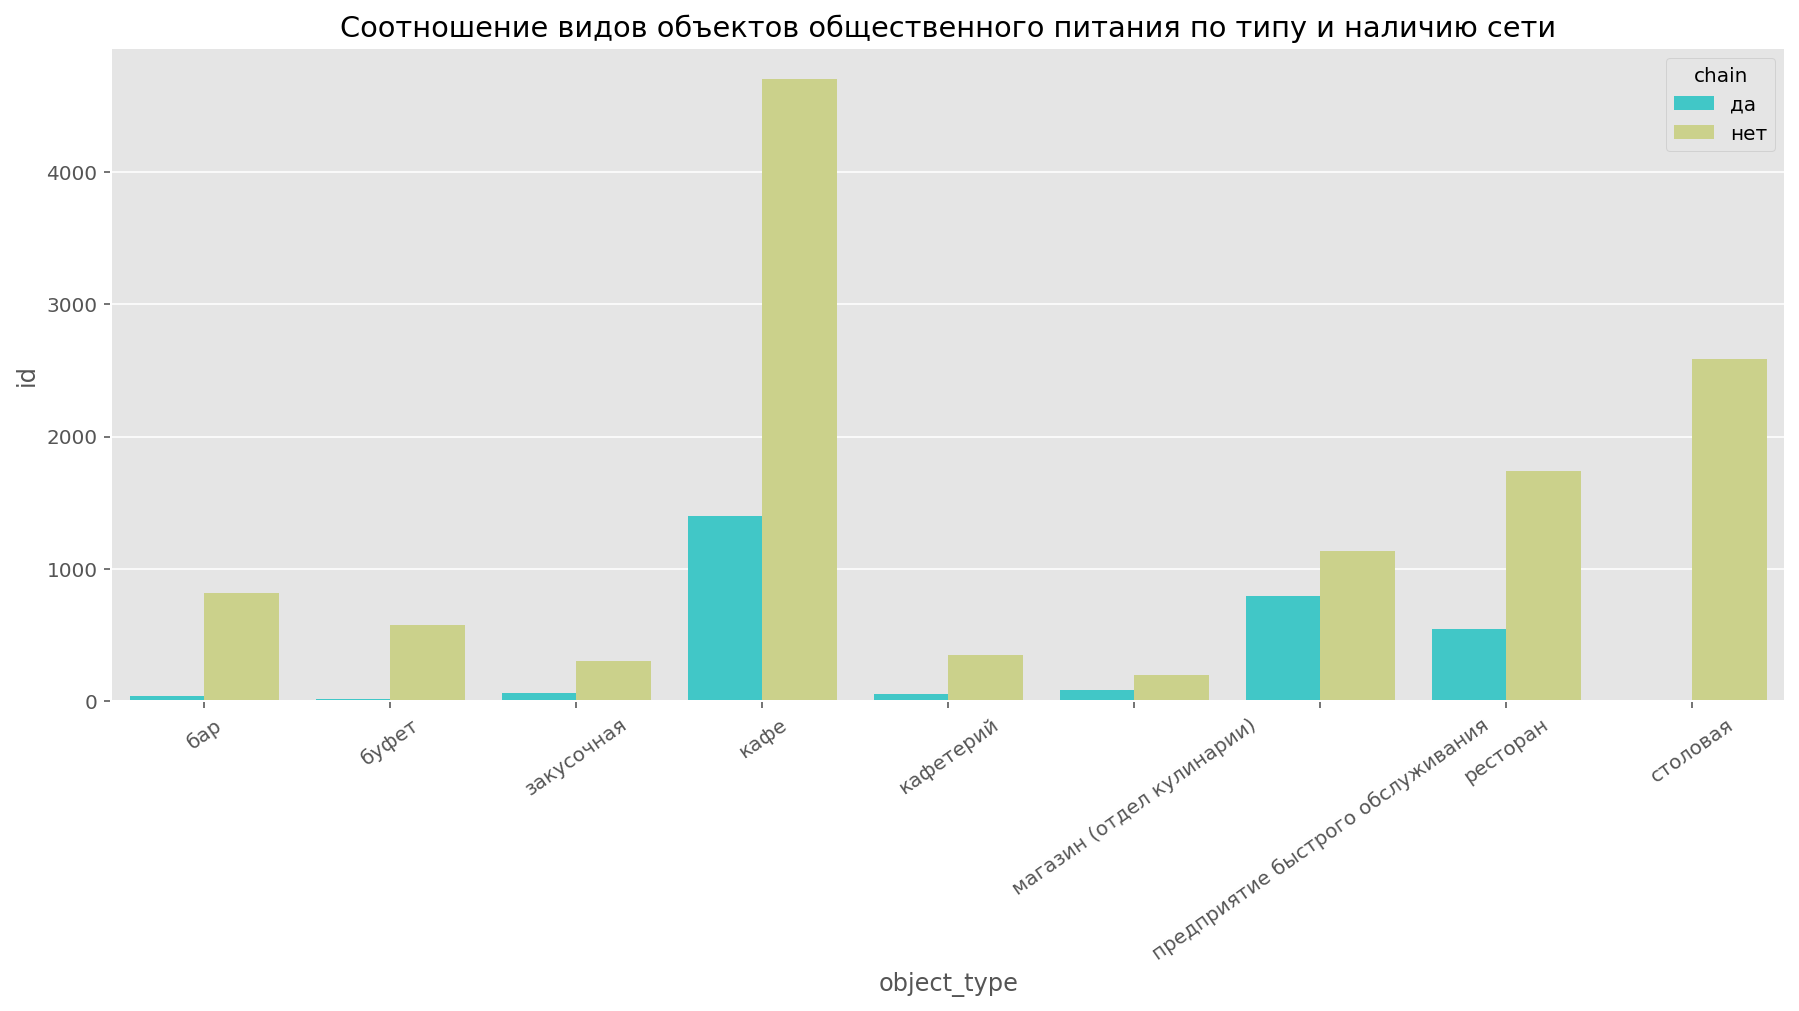

In [8]:
# построим график соотношения объектов питания сетевых/несетевых по количеству
fig, test = plt.subplots()
plt.xticks(rotation=35)
sns.barplot(
           x='object_type',
            y='id',
            hue='chain',
            data=data_type_chain,
            palette='rainbow'
)
            
test.set_title('Cоотношение видов объектов общественного питания по типу и наличию сети');



<br><b>Вывод:</b> 
<br>В изучаемом датасете по количеству превалируют такие типы заведений как - кафе, столовые и рестораны, также можно выделить магазины(отдел кулинарии). 
<br>Сетевое распространение больше всего наблюдается у кафе, предприятий быстрого обслу=уживания, реторанов.

In [9]:
# выясним количество сетевых заведений по типу объекта и среднее количество посадочных мест в них
chain_object = (data_type_chain.query('chain == "да"')
               .pivot_table(values=['id','number'],index='object_type').sort_values(by='id', ascending = False))
chain_object

,id,number
object_type,,
кафе,1396,47.0
предприятие быстрого обслуживания,791,40.0
ресторан,544,100.0
магазин (отдел кулинарии),78,9.0
закусочная,56,14.0
кафетерий,52,12.0
бар,37,53.0
буфет,11,13.0
столовая,3,112.0


In [10]:
# выясним существует ли коррелиция между количеством заведений и посадочными местами в сетевых заведениях
chain_object.corr()

,id,number
id,1.000000,0.160829
number,0.160829,1.000000


<br><b>Вывод:</b>
<br>Отвечая на вопрос, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?  - Согласно данным мы не видим зависимость между количеством заведений и посадочными местами, можно сказать, что количество посадочных мест характеризуется по типу заведений, в частности в кафе больше объектов со средним значением посадочных мест равным 47, количество ресторанов меньше, но посадочных мест в 2 раза больше, чем в кафе. 

###  График среднего количества посадочных мест

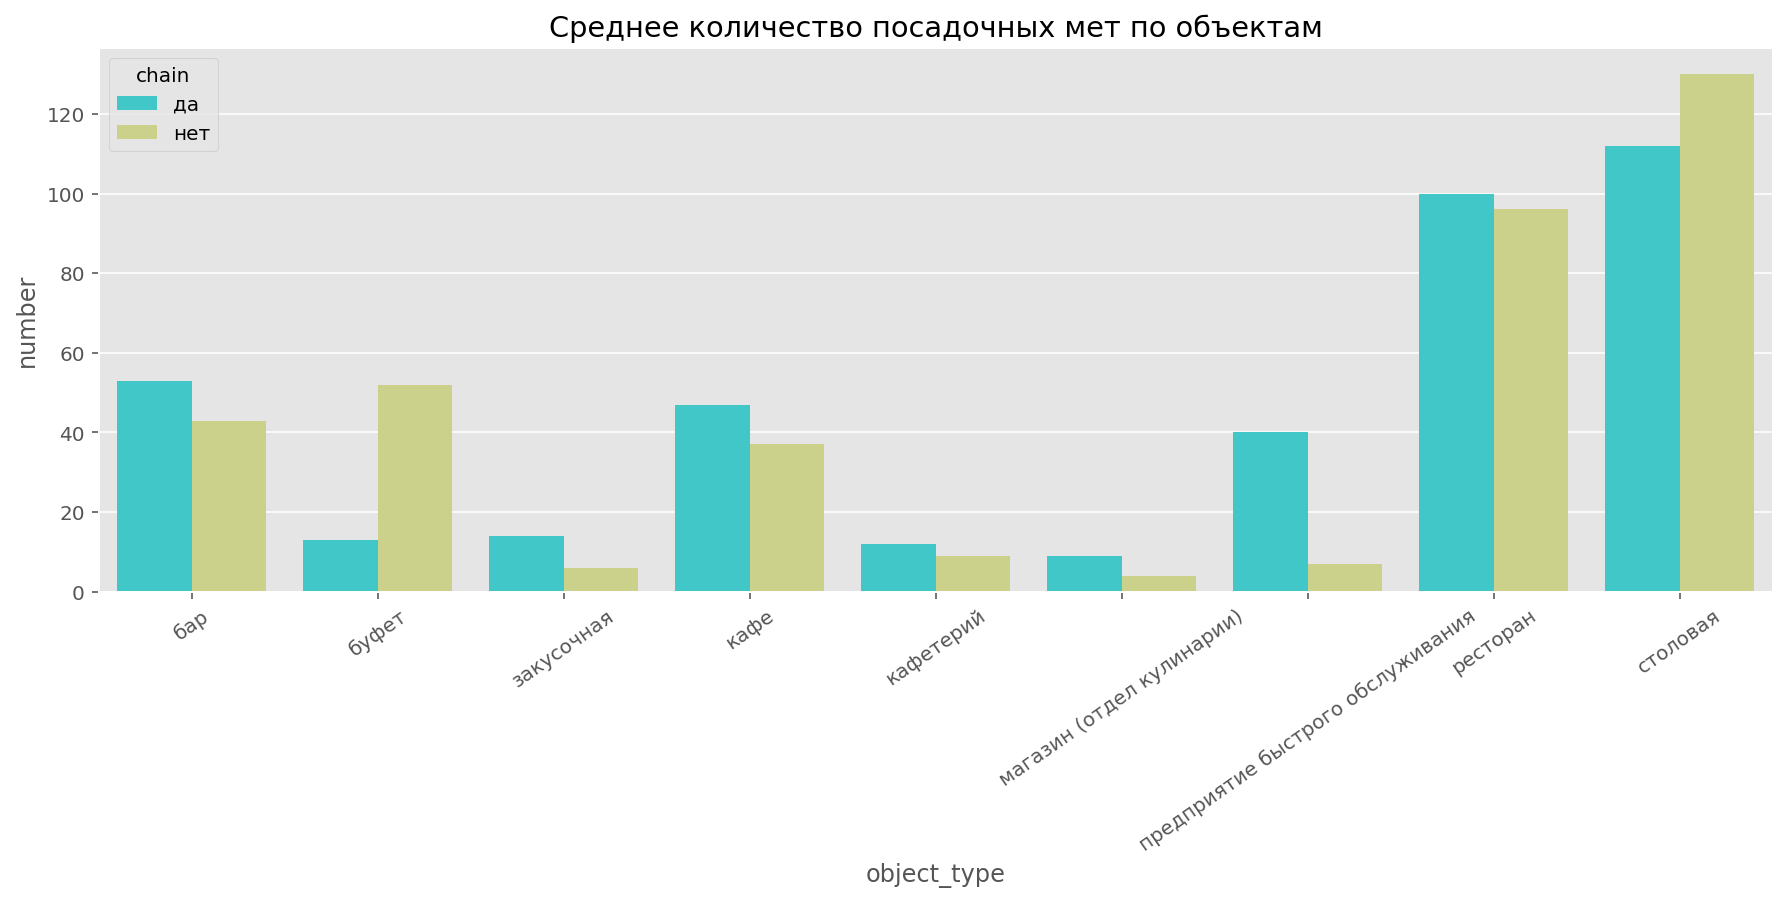

In [11]:
# построим график среднего количества посадочных мест
fig, test = plt.subplots()
fig.set_figheight(5)  
fig.set_figwidth(15)
plt.xticks(rotation=35)
sns.barplot(
           x='object_type',
            y='number',
            hue='chain',
            data=data_type_chain,
            palette='rainbow'
)
test.set_title('Среднее количество посадочных мет по объектам');

<br><b>Вывод:</b> В столовых и ресторанах самое большое количество посадочных мест, в 1,5 раза меньше у кафе и баров.

### Изучение распределения заведений по районам города

In [12]:
# добавляем столбец с улицей
rest_data['street'] = rest_data['address'].str.split(', ', expand = True)[1]
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


In [13]:
# исключаем из данных наименования "город" и "поселение"
rest_data = rest_data[rest_data['street'].str.contains('город|поселение|владение|деревня') == False]
display(rest_data)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал


In [14]:
# найдем топ-10 улиц по количеству объектов общественного питания
street_objects = rest_data.groupby(['street','object_type']).agg({'id': 'count','number': 'mean'}).reset_index().sort_values(by='id', ascending = False).round()
top_streets = street_objects.sort_values(by='id',ascending = False).head(10)
top_streets

,street,object_type,id,number
3506,проспект Мира,кафе,103,59.0
2366,Пресненская набережная,кафе,98,35.0
2405,Профсоюзная улица,кафе,90,41.0
1598,Ленинградский проспект,кафе,70,37.0
1615,Ленинский проспект,кафе,64,38.0
888,Варшавское шоссе,кафе,63,41.0
4119,улица Ленинская Слобода,кафе,60,21.0
3948,улица Земляной Вал,кафе,58,42.0
1606,Ленинградское шоссе,кафе,56,38.0
4627,улица Сущёвский Вал,кафе,56,25.0


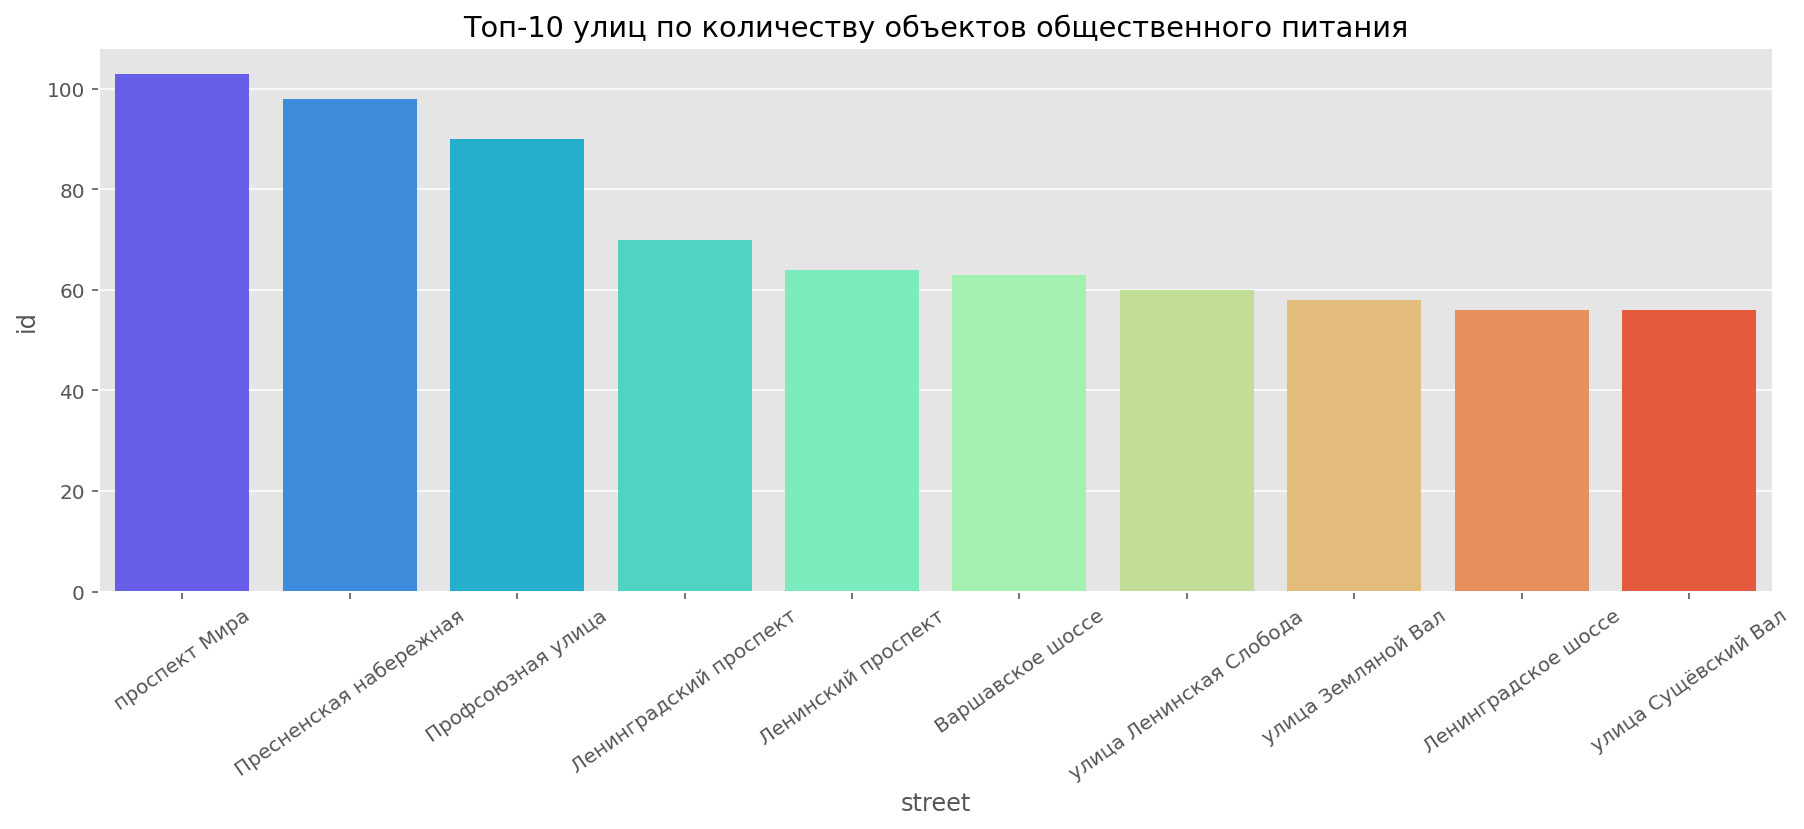

In [15]:
# построим график топ-10 улиц по количеству объектов общественного питания
fig, test = plt.subplots()
fig.set_figheight(5)  
fig.set_figwidth(15)
plt.xticks(rotation=35)
sns.barplot(
           x='street',
            y='id',
            data=top_streets,
            palette='rainbow'
)
test.set_title('Топ-10 улиц по количеству объектов общественного питания');

In [16]:
# загрузим внешний датасет с информацией о районах и округам г. Москвы   
from io import BytesIO
import requests
spreadsheet_id = '1lHS3u_sa_UU-fsiFP-YVMBKgyPptQKEQ-Pu6bQzSqNg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_area = pd.read_csv(BytesIO(r.content))
df_area = df_area.rename(columns={'streetname':'street'})
df_area

,street,okrug,area
0,Выставочный переулок,ЦАО,Пресненский
1,улица Гашека,ЦАО,Пресненский
2,Большая Никитская улица,ЦАО,Пресненский
3,Глубокий переулок,ЦАО,Пресненский
4,Большой Гнездниковский переулок,ЦАО,Пресненский
...,...,...,...
4258,Вознесенский проезд,ЦАО,Пресненский
4259,Волков переулок,ЦАО,Пресненский
4260,Поварская улица,ЦАО,Пресненский
4261,Кудринская площадь,ЦАО,Пресненский


In [17]:
# объединим таблицы с топ-10 улицами и райнами
top_streets_merged = top_streets.merge(df_area,how = 'left' , on='street')
top_streets_merged.head(10)

,street,object_type,id,number,okrug,area
0,проспект Мира,кафе,103,59.0,СВАО,Алексеевский
1,проспект Мира,кафе,103,59.0,СВАО,Ярославский Район
2,проспект Мира,кафе,103,59.0,СВАО,Марьина роща
3,проспект Мира,кафе,103,59.0,СВАО,Останкинский
4,проспект Мира,кафе,103,59.0,СВАО,Ростокино
5,проспект Мира,кафе,103,59.0,СВАО,Свиблово
6,проспект Мира,кафе,103,59.0,ЦАО,Мещанский
7,Пресненская набережная,кафе,98,35.0,ЦАО,Пресненский
8,Профсоюзная улица,кафе,90,41.0,ЮЗАО,Академический
9,Профсоюзная улица,кафе,90,41.0,ЮЗАО,Черемушки


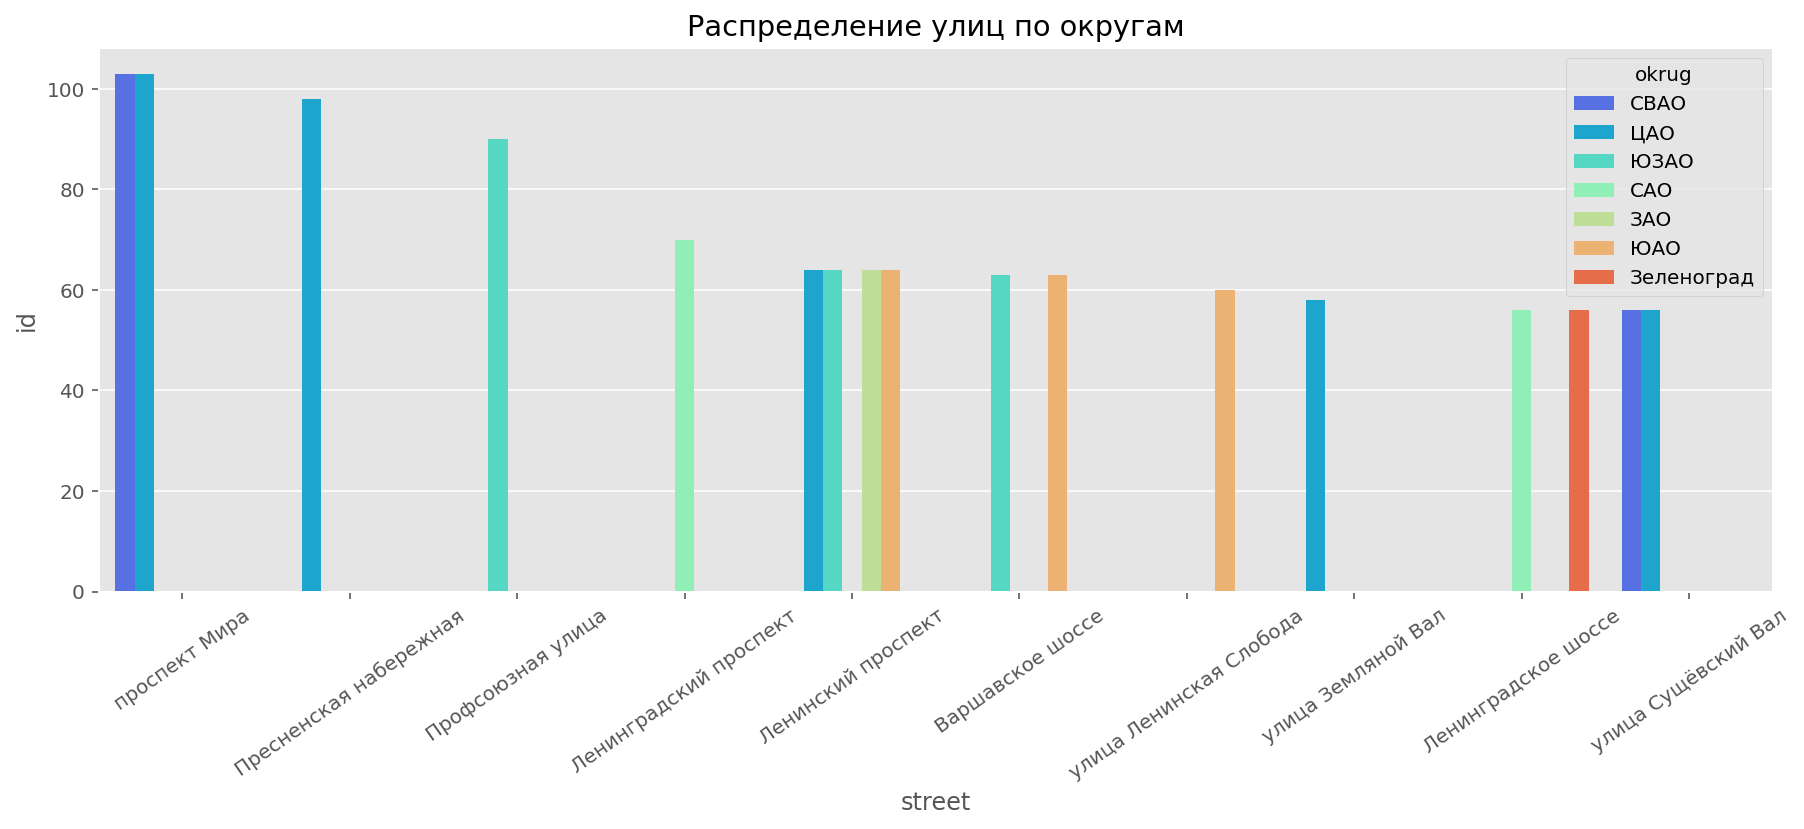

In [18]:
# построим график топ-10 улиц по количеству объектов общественного питания
fig, test = plt.subplots()
fig.set_figheight(5)  
fig.set_figwidth(15)
plt.xticks(rotation=35)
sns.barplot(
           x='street',
            y='id',
            hue ='okrug',
            data=top_streets_merged,
            palette='rainbow'
)
test.set_title('Распределение улиц по округам');
plt.show()

<br><b>Вывод:</b> 
<br>улицы с наибольшим количесвом заведений располагаются одновременно в нескольких районах города, более того даже в разных округах. Для большей наглядность на графике улицы сгруппированы по округам, а не по районам.

In [19]:
# Найдем число улиц с одним объектом общественного питания
single_object = street_objects[street_objects['id'] == 1]
single_object

,street,object_type,id,number
4763,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0
4530,улица Руднёвка,столовая,1,180.0
3423,проезд Аэропорта,буфет,1,0.0
4722,улица Шверника,предприятие быстрого обслуживания,1,0.0
3108,Цимлянская улица,ресторан,1,95.0
...,...,...,...,...
2072,Новопетровская улица,кафе,1,45.0
2074,Новопоселковая улица,предприятие быстрого обслуживания,1,0.0
2075,Новопоселковая улица,столовая,1,36.0
2076,Новопресненский переулок,столовая,1,30.0


In [20]:
# объединим таблицы 
single_object_merged = single_object.merge(df_area,how = 'left' , on='street')
single_object_merged

,street,object_type,id,number,okrug,area
0,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0,ВАО,Измайлово
1,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0,ВАО,Перово
2,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0,ВАО,Соколиная Гора
3,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0,ВАО,Ивановское
4,шоссе Энтузиастов,магазин (отдел кулинарии),1,6.0,ЮВАО,Лефортово
...,...,...,...,...,...,...
3288,Новопетровская улица,кафе,1,45.0,САО,Коптево
3289,Новопоселковая улица,предприятие быстрого обслуживания,1,0.0,СЗАО,Южное Тушино
3290,Новопоселковая улица,столовая,1,36.0,СЗАО,Южное Тушино
3291,Новопресненский переулок,столовая,1,30.0,ЦАО,Пресненский


<br><b>Вывод:</b>
<br>Количеcтво улиц с одним заведением более 600, они есть в каждом районе города и, соответсвенно, в каждом округе.

### Распределение количества посадочных мест по улицам

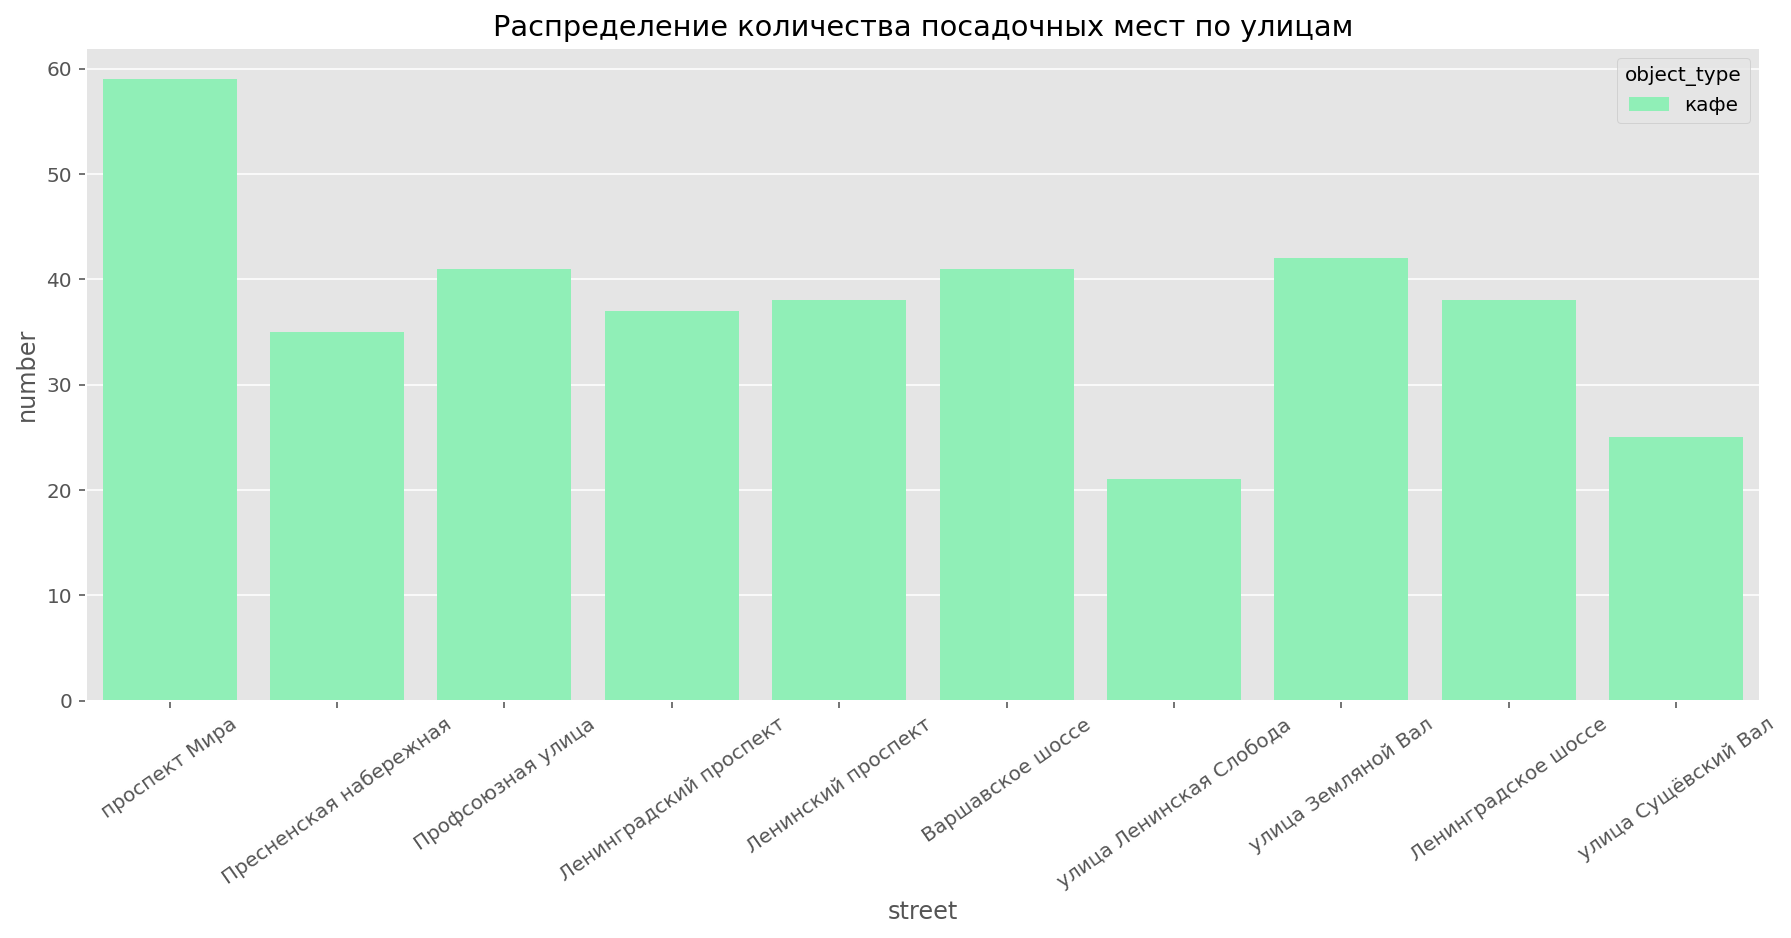

In [21]:
# посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов
fig, test = plt.subplots()
plt.xticks(rotation=35)
sns.barplot(
           x='street',
            y='number',
            hue ='object_type',
            data=top_streets,
            palette='rainbow'
)
test.set_title('Распределение количества посадочных мест по улицам');
plt.show()

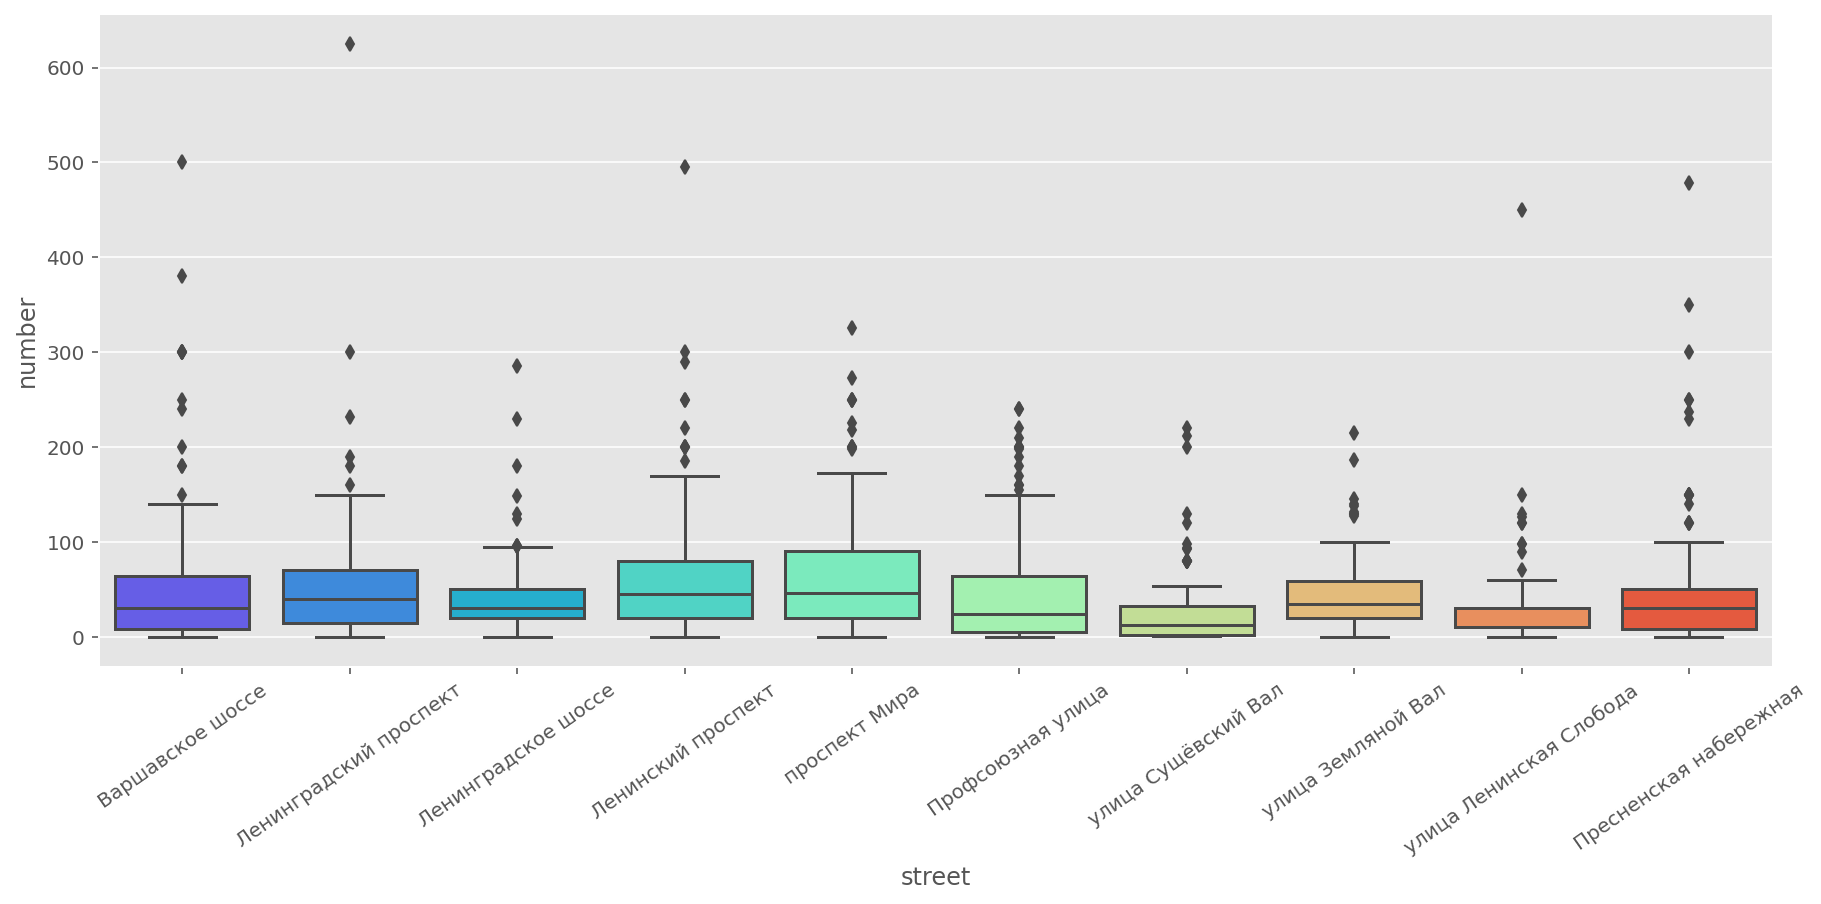

In [22]:
# построим boxplot
plt.xticks(rotation=35)
sns.boxplot(
           x='street',
            y='number',
            data=rest_data.loc[rest_data["street"].isin(top_streets["street"].unique())],
            palette='rainbow'
)
test.set_title('Распределение количества посадочных мест по улицам');
plt.show()

<br><b>Вывод:</b>
<br>Для заведений, расположенных на наиболее популярных улицах характерно в среднем 35-40 посадочных ммест.Также важность особенностью является, что все заведения относяится к типу "кафе".

## Рекомендации
<br>1. Наиболее распростаненный тип объета - кафе
<br>2. Возможность развития сети высокая, кафе имеют наибольшее сетевое распространие из всех видов объектов
<br>3. Количество посадочных мест от 30 до 40
<br>4. Самые популярные улицы среди кафе: проспет Мира, Пресненская набережная, Профсоюзная улица, Ленинграский проспект, Ленинский проспект, Варшавское шоссе, улица Ленинская Слобода, Ленинградское шоссе, улица Сущевский Вал
  

## Презентация

Ссылка: <https://drive.google.com/file/d/1hxgx0LlbXljYg-SaRMxmBZv78takyyFw/view?usp=sharing>